In [248]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import func4behav as fb
import imp
imp.reload(fb)

<module 'func4behav' from 'c:\\Users\\Tianyi Zheng\\OneDrive - neuron.t.u-tokyo.ac.jp\\Documents\\zheng\\mywork\\attention_tES\\tes-attention\\processing\\behavior\\func4behav.py'>

In [249]:
# for subject_id in range(1,19):
#     done = fb.add_trial_num(subject_id=subject_id)

In [250]:
real_to_pick = [1,3,5,9]
sham_to_pick = [2,7,11,15,16]

In [251]:
behavior_compare = fb.create_compare()
for subject_id in range (1,19):
    behavior_before, behavior_after = fb.load_behavior(subject_id)
    behavior_compare = fb.make_compare(subject_id, behavior_before, behavior_after, behavior_compare) #, verbose=True)

behavior_watch = behavior_compare[behavior_compare['Real stimulation'] == 1]
display(behavior_watch.drop(['trials_before', 'trials_after'], axis=1))

behavior_watch = behavior_compare[behavior_compare['Real stimulation'] == 0]
display(behavior_watch.drop(['trials_before', 'trials_after'], axis=1))

# real_to_pick = [1,3,5,9]
# sham_to_pick = [2,11,15,16]
behavior_compare = behavior_compare[behavior_compare['subject id'].isin(real_to_pick+sham_to_pick)]
display(behavior_compare.drop(['trials_before', 'trials_after'], axis=1))

,subject id,Real stimulation,RT mean shorten,RT median shorten,RT mean shorten %,RT std decrease,RT median shorten %
0,1,1,26.76976,26.99,12.514885,-16.933321,12.794501
2,3,1,39.406929,36.3,15.664043,4.59993,15.138877
3,4,1,-9.532244,-13.04,-3.685283,-14.812028,-5.433107
4,5,1,55.211244,57.11,18.095039,-5.470487,18.979097
8,9,1,40.240727,33.8,11.580899,23.505534,10.077069
11,12,1,-41.41479,-41.34,-16.047443,-18.270812,-16.794637
12,13,1,-30.04954,-33.02,-11.55628,-2.499129,-13.019991
16,17,1,19.494964,27.23,4.828231,6.334261,6.944126
17,18,1,24.672682,31.22,7.765791,4.402324,9.958533


,subject id,Real stimulation,RT mean shorten,RT median shorten,RT mean shorten %,RT std decrease,RT median shorten %
1,2,0,38.430033,34.735,11.058114,24.118791,10.20612
5,6,0,-19.277022,-22.24,-7.060572,-13.305289,-8.435106
6,7,0,28.859101,27.66,9.687455,1.146242,9.81495
7,8,0,44.000276,40.49,16.138321,12.637271,15.477829
9,10,0,10.94011,9.585,4.150813,8.713362,3.728484
10,11,0,15.213258,15.245,5.883956,9.027588,5.968484
13,14,0,50.851071,48.75,14.137163,25.097425,13.944707
14,15,0,11.47056,22.115,2.980472,-6.116775,5.766999
15,16,0,22.358248,25.615,7.407182,6.138122,8.525971


,subject id,Real stimulation,RT mean shorten,RT median shorten,RT mean shorten %,RT std decrease,RT median shorten %
0,1,1,26.76976,26.99,12.514885,-16.933321,12.794501
1,2,0,38.430033,34.735,11.058114,24.118791,10.20612
2,3,1,39.406929,36.3,15.664043,4.59993,15.138877
4,5,1,55.211244,57.11,18.095039,-5.470487,18.979097
6,7,0,28.859101,27.66,9.687455,1.146242,9.81495
8,9,1,40.240727,33.8,11.580899,23.505534,10.077069
10,11,0,15.213258,15.245,5.883956,9.027588,5.968484
14,15,0,11.47056,22.115,2.980472,-6.116775,5.766999
15,16,0,22.358248,25.615,7.407182,6.138122,8.525971


In [252]:
# behavior_compare = behavior_compare[behavior_compare['RT median shorten %'] >= 0]

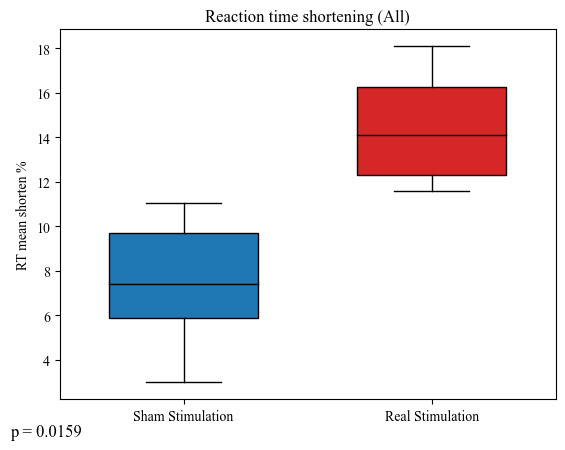

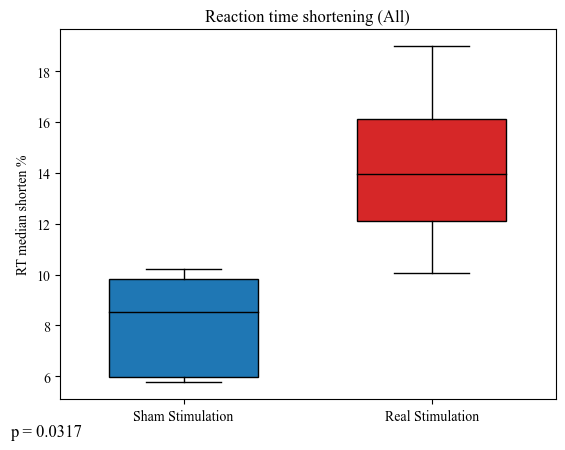

In [253]:
# box plot of RT difference
compare_objects = ["RT mean shorten %", "RT median shorten %"]
for compare_object in compare_objects:
    watch = 'All'
    save_path = os.path.join('..', '..', '..', 'docs', 'report', 'figs', watch+"_"+compare_object+'.png')

    rt_diff_sham = behavior_compare.loc[behavior_compare['Real stimulation'] == 0, compare_object]
    rt_diff_real = behavior_compare.loc[behavior_compare['Real stimulation'] == 1, compare_object]
    rt_diff_sham = pd.to_numeric(rt_diff_sham)
    rt_diff_real = pd.to_numeric(rt_diff_real)

    # create boxplot
    # Create a box plot with whiskers
    fig, ax = plt.subplots()
    boxplots = ax.boxplot([rt_diff_sham, rt_diff_real], patch_artist=True, widths=0.6, showfliers=False)

    # Set colors for the box plots
    colors = ['#1f77b4', '#d62728']
    for patch, color in zip(boxplots['boxes'], colors):
        patch.set_facecolor(color)

    # Set median line color to black
    for median in boxplots['medians']:
        median.set_color('black')

    plt.xticks([1, 2], ['Sham Stimulation', 'Real Stimulation'])
    plt.ylabel(compare_object)
    plt.title('Reaction time shortening' + ' (' + watch + ')')

    # Perform the Mann-Whitney U test
    U, p_value = stats.mannwhitneyu(rt_diff_sham, rt_diff_real)

    # Add the p-value to the plot
    ax.annotate(f'p = {p_value:.4f}',
                xy=(-0.1, -0.1),
                xycoords=('axes fraction', 'axes fraction'),
                ha='left', fontsize=12)
    plt.savefig(save_path, format='png')

    plt.show()

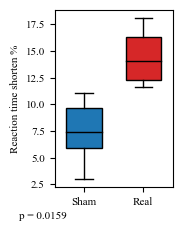

In [254]:
# for EMBC paper
# box plot of RT difference
compare_objects = ["RT mean shorten %"]
for compare_object in compare_objects:
    rt_diff_sham = behavior_compare.loc[behavior_compare['Real stimulation'] == 0, compare_object]
    rt_diff_real = behavior_compare.loc[behavior_compare['Real stimulation'] == 1, compare_object]
    rt_diff_sham = pd.to_numeric(rt_diff_sham)
    rt_diff_real = pd.to_numeric(rt_diff_real)

    # create boxplot
    # set size
    width_inches = 4.3 / 2.54
    height_inches = 6 / 2.54
    fontsize = 8

    # Create a box plot with whiskers
    fig, ax = plt.subplots(figsize=(width_inches, height_inches))
    plt.rcParams["font.family"] = "Times new roman"

    boxplots = ax.boxplot([rt_diff_sham, rt_diff_real], patch_artist=True, widths=0.6, showfliers=False)

    # Set colors for the box plots
    colors = ['#1f77b4', '#d62728']
    for patch, color in zip(boxplots['boxes'], colors):
        patch.set_facecolor(color)

    # Set median line color to black
    for median in boxplots['medians']:
        median.set_color('black')

    plt.xticks([1, 2], ['Sham', 'Real'], fontsize=fontsize)
    plt.ylabel("Reaction time shorten %", fontsize=fontsize)

    # Perform the Mann-Whitney U test
    U, p_value = stats.mannwhitneyu(rt_diff_sham, rt_diff_real)

    # Add the p-value to the plot
    ax.annotate(f'p = {p_value:.4f}',
                xy=(-0.3, -0.18),
                xycoords=('axes fraction', 'axes fraction'),
                ha='left', fontsize=fontsize)

    ax.tick_params(axis="x", labelsize=fontsize)
    ax.tick_params(axis="y", labelsize=fontsize)

    plt.subplots_adjust(left=0.25, bottom=0.2, right=0.95, top=0.95)
    
    # plt.savefig('../docs/fig2A.eps', format='eps')

    plt.show()

## Endo

In [255]:
behavior_compare = fb.create_compare()
for subject_id in range (1,19):
    behavior_before, behavior_after = fb.load_behavior(subject_id)

    # pick endo
    behavior_before = behavior_before[behavior_before['type'] == 1]
    behavior_after = behavior_after[behavior_after['type'] == 1]

    behavior_compare = fb.make_compare(subject_id, behavior_before, behavior_after, behavior_compare) #, verbose=True)


behavior_watch = behavior_compare[behavior_compare['Real stimulation'] == 1]
display(behavior_watch.drop(['trials_before', 'trials_after'], axis=1))

behavior_watch = behavior_compare[behavior_compare['Real stimulation'] == 0]
display(behavior_watch.drop(['trials_before', 'trials_after'], axis=1))

# real_to_pick = [1,3,5,9]
# sham_to_pick = [2,11,15,16]
behavior_compare = behavior_compare[behavior_compare['subject id'].isin(real_to_pick+sham_to_pick)]
display(behavior_compare.drop(['trials_before', 'trials_after'], axis=1))

,subject id,Real stimulation,RT mean shorten,RT median shorten,RT mean shorten %,RT std decrease,RT median shorten %
0,1,1,26.628214,32.1,11.791835,-7.347602,14.612163
2,3,1,25.78851,22.45,10.299667,4.288378,9.5111
3,4,1,-37.53612,-37.835,-15.484511,-26.138183,-17.056622
4,5,1,53.397657,49.365,18.394894,-5.961539,17.255361
8,9,1,31.469608,25.62,9.290195,22.54206,7.974104
11,12,1,-33.359312,-34.27,-13.609261,-16.808381,-14.046809
12,13,1,-34.930981,-40.38,-13.99658,-0.182921,-16.726038
16,17,1,33.741793,37.65,8.814383,21.022661,10.002391
17,18,1,28.86375,33.165,8.970161,-1.527265,10.601605


,subject id,Real stimulation,RT mean shorten,RT median shorten,RT mean shorten %,RT std decrease,RT median shorten %
1,2,0,31.984858,20.08,10.158078,30.185825,6.671429
5,6,0,-11.434906,-9.25,-4.092505,-9.364287,-3.408756
6,7,0,25.427987,26.125,8.595931,0.276741,9.37758
7,8,0,41.908883,48.62,17.072815,9.986566,19.537874
9,10,0,24.0246,19.635,8.510788,12.002543,7.393392
10,11,0,18.894666,12.115,7.090163,15.36634,4.748373
13,14,0,36.5,31.985,10.526457,10.629616,9.728538
14,15,0,12.86243,18.68,3.468254,-0.102877,5.112905
15,16,0,27.488402,22.415,8.762395,10.216008,7.405266


,subject id,Real stimulation,RT mean shorten,RT median shorten,RT mean shorten %,RT std decrease,RT median shorten %
0,1,1,26.628214,32.1,11.791835,-7.347602,14.612163
1,2,0,31.984858,20.08,10.158078,30.185825,6.671429
2,3,1,25.78851,22.45,10.299667,4.288378,9.5111
4,5,1,53.397657,49.365,18.394894,-5.961539,17.255361
6,7,0,25.427987,26.125,8.595931,0.276741,9.37758
8,9,1,31.469608,25.62,9.290195,22.54206,7.974104
10,11,0,18.894666,12.115,7.090163,15.36634,4.748373
14,15,0,12.86243,18.68,3.468254,-0.102877,5.112905
15,16,0,27.488402,22.415,8.762395,10.216008,7.405266


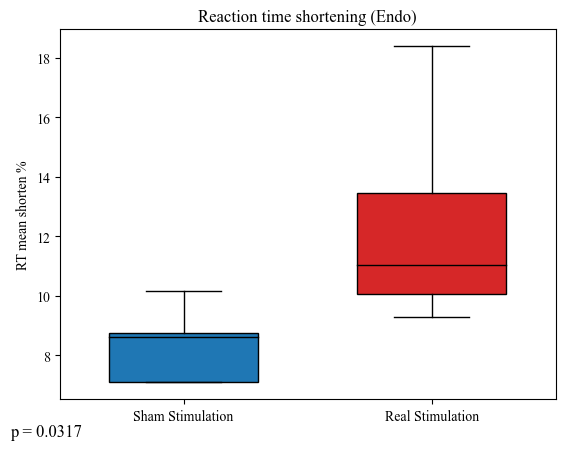

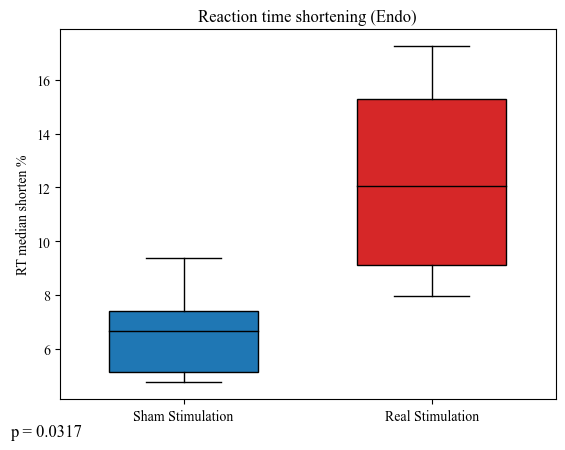

In [256]:
# box plot of RT difference
compare_objects = ["RT mean shorten %", "RT median shorten %"]
for compare_object in compare_objects:
    watch = 'Endo'
    save_path = os.path.join('..', '..', '..', 'docs', 'report', 'figs', watch+"_"+compare_object+'.png')

    rt_diff_sham = behavior_compare.loc[behavior_compare['Real stimulation'] == 0, compare_object]
    rt_diff_real = behavior_compare.loc[behavior_compare['Real stimulation'] == 1, compare_object]
    rt_diff_sham = pd.to_numeric(rt_diff_sham)
    rt_diff_real = pd.to_numeric(rt_diff_real)

    # create boxplot
    # Create a box plot with whiskers
    fig, ax = plt.subplots()
    boxplots = ax.boxplot([rt_diff_sham, rt_diff_real], patch_artist=True, widths=0.6, showfliers=False)

    # Set colors for the box plots
    colors = ['#1f77b4', '#d62728']
    for patch, color in zip(boxplots['boxes'], colors):
        patch.set_facecolor(color)

    # Set median line color to black
    for median in boxplots['medians']:
        median.set_color('black')

    plt.xticks([1, 2], ['Sham Stimulation', 'Real Stimulation'])
    plt.ylabel(compare_object)
    plt.title('Reaction time shortening' + ' (' + watch + ')')

    # Perform the Mann-Whitney U test
    U, p_value = stats.mannwhitneyu(rt_diff_sham, rt_diff_real)

    # Add the p-value to the plot
    ax.annotate(f'p = {p_value:.4f}',
                xy=(-0.1, -0.1),
                xycoords=('axes fraction', 'axes fraction'),
                ha='left', fontsize=12)
    plt.savefig(save_path, format='png')

    plt.show()

## Exo

In [257]:
behavior_compare = fb.create_compare()
for subject_id in range (1,19):
    behavior_before, behavior_after = fb.load_behavior(subject_id)

    # pick endo
    behavior_before = behavior_before[behavior_before['type'] == 2]
    behavior_after = behavior_after[behavior_after['type'] == 2]

    behavior_compare = fb.make_compare(subject_id, behavior_before, behavior_after, behavior_compare) #, verbose=True)

behavior_watch = behavior_compare[behavior_compare['Real stimulation'] == 1]
display(behavior_watch.drop(['trials_before', 'trials_after'], axis=1))

behavior_watch = behavior_compare[behavior_compare['Real stimulation'] == 0]
display(behavior_watch.drop(['trials_before', 'trials_after'], axis=1))

# real_to_pick = [1,3,5,9]
# sham_to_pick = [2,11,15,16]
behavior_compare = behavior_compare[behavior_compare['subject id'].isin(real_to_pick+sham_to_pick)]
display(behavior_compare.drop(['trials_before', 'trials_after'], axis=1))


,subject id,Real stimulation,RT mean shorten,RT median shorten,RT mean shorten %,RT std decrease,RT median shorten %
0,1,1,34.869802,29.075,16.614148,-14.57954,13.926476
2,3,1,53.027273,49.78,21.188642,-5.194839,20.600894
3,4,1,19.903413,24.78,7.209164,-4.591027,9.751682
4,5,1,64.004726,63.82,20.004537,-3.229819,20.16812
8,9,1,49.714108,39.69,14.103859,26.828805,11.592383
11,12,1,-32.657086,-34.88,-11.910084,-1.740072,-13.476547
12,13,1,-21.197414,-21.945,-7.786726,-2.002045,-8.20742
16,17,1,12.269184,27.78,2.911353,2.750259,6.645218
17,18,1,20.621798,29.135,6.571959,10.592824,9.289461


,subject id,Real stimulation,RT mean shorten,RT median shorten,RT mean shorten %,RT std decrease,RT median shorten %
1,2,0,43.953464,36.345,11.827228,18.40743,10.029112
5,6,0,-26.256943,-34.28,-9.821174,-16.871717,-13.289397
6,7,0,32.437497,43.8,11.116312,2.299195,15.085242
7,8,0,41.161842,37.59,14.118521,13.470759,13.485686
9,10,0,-1.679837,-0.725,-0.667988,-1.761903,-0.287784
10,11,0,13.21049,17.04,5.157456,7.696183,6.624679
13,14,0,64.292402,54.45,17.041966,36.963243,14.885997
14,15,0,24.830034,40.07,6.083168,2.563711,9.907771
15,16,0,22.238448,27.91,7.394983,7.731492,9.289863


,subject id,Real stimulation,RT mean shorten,RT median shorten,RT mean shorten %,RT std decrease,RT median shorten %
0,1,1,34.869802,29.075,16.614148,-14.57954,13.926476
1,2,0,43.953464,36.345,11.827228,18.40743,10.029112
2,3,1,53.027273,49.78,21.188642,-5.194839,20.600894
4,5,1,64.004726,63.82,20.004537,-3.229819,20.16812
6,7,0,32.437497,43.8,11.116312,2.299195,15.085242
8,9,1,49.714108,39.69,14.103859,26.828805,11.592383
10,11,0,13.21049,17.04,5.157456,7.696183,6.624679
14,15,0,24.830034,40.07,6.083168,2.563711,9.907771
15,16,0,22.238448,27.91,7.394983,7.731492,9.289863


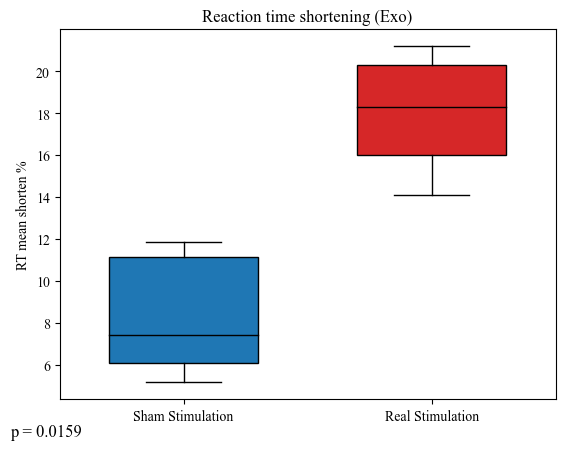

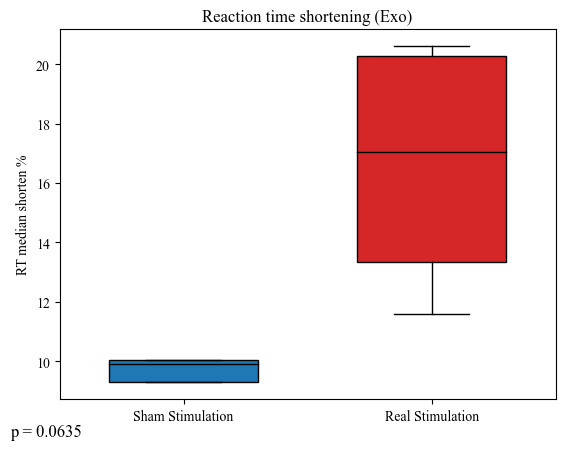

In [258]:
# box plot of RT difference
compare_objects = ["RT mean shorten %", "RT median shorten %"]
for compare_object in compare_objects:
    watch = 'Exo'
    save_path = os.path.join('..', '..', '..', 'docs', 'report', 'figs', watch+"_"+compare_object+'.png')

    rt_diff_sham = behavior_compare.loc[behavior_compare['Real stimulation'] == 0, compare_object]
    rt_diff_real = behavior_compare.loc[behavior_compare['Real stimulation'] == 1, compare_object]
    rt_diff_sham = pd.to_numeric(rt_diff_sham)
    rt_diff_real = pd.to_numeric(rt_diff_real)

    # create boxplot
    # Create a box plot with whiskers
    fig, ax = plt.subplots()
    boxplots = ax.boxplot([rt_diff_sham, rt_diff_real], patch_artist=True, widths=0.6, showfliers=False)

    # Set colors for the box plots
    colors = ['#1f77b4', '#d62728']
    for patch, color in zip(boxplots['boxes'], colors):
        patch.set_facecolor(color)

    # Set median line color to black
    for median in boxplots['medians']:
        median.set_color('black')

    plt.xticks([1, 2], ['Sham Stimulation', 'Real Stimulation'])
    plt.ylabel(compare_object)
    plt.title('Reaction time shortening' + ' (' + watch + ')')

    # Perform the Mann-Whitney U test
    U, p_value = stats.mannwhitneyu(rt_diff_sham, rt_diff_real)

    # Add the p-value to the plot
    ax.annotate(f'p = {p_value:.4f}',
                xy=(-0.1, -0.1),
                xycoords=('axes fraction', 'axes fraction'),
                ha='left', fontsize=12)
    plt.savefig(save_path, format='png')

    plt.show()

## Valid

In [259]:
behavior_compare = fb.create_compare()
for subject_id in range (1,19):
    behavior_before, behavior_after = fb.load_behavior(subject_id)

    # pick endo
    behavior_before = behavior_before[behavior_before['valid'] == 1]
    behavior_after = behavior_after[behavior_after['valid'] == 1]

    behavior_compare = fb.make_compare(subject_id, behavior_before, behavior_after, behavior_compare) # , verbose=True)

behavior_watch = behavior_compare[behavior_compare['Real stimulation'] == 1]
display(behavior_watch.drop(['trials_before', 'trials_after'], axis=1))

behavior_watch = behavior_compare[behavior_compare['Real stimulation'] == 0]
display(behavior_watch.drop(['trials_before', 'trials_after'], axis=1))

# real_to_pick = [1,3,5,9]
# sham_to_pick = [2,11,15,16]
behavior_compare = behavior_compare[behavior_compare['subject id'].isin(real_to_pick+sham_to_pick)]
display(behavior_compare.drop(['trials_before', 'trials_after'], axis=1))

,subject id,Real stimulation,RT mean shorten,RT median shorten,RT mean shorten %,RT std decrease,RT median shorten %
0,1,1,32.76884,30.335,15.683827,-6.74439,14.596766
2,3,1,33.433153,36.07,14.155228,-4.962692,15.470063
3,4,1,6.824642,-2.57,2.616063,8.523559,-1.070789
4,5,1,61.805625,63.01,20.560604,1.265376,21.023656
8,9,1,25.576512,19.905,7.925362,8.032909,6.35577
11,12,1,-36.545532,-32.92,-14.639637,-21.042692,-13.531177
12,13,1,-25.89141,-32.735,-10.115973,-0.222909,-13.309075
16,17,1,31.063243,28.74,7.826935,17.461142,7.556397
17,18,1,26.761748,32.35,8.528849,5.982513,10.411638


,subject id,Real stimulation,RT mean shorten,RT median shorten,RT mean shorten %,RT std decrease,RT median shorten %
1,2,0,32.229989,32.64,9.464664,16.653081,9.74823
5,6,0,-15.408602,-16.94,-5.711596,-10.133306,-6.485203
6,7,0,41.738123,35.48,14.45263,13.329939,12.715479
7,8,0,49.730011,36.48,18.664642,19.494197,14.374655
9,10,0,4.752679,3.275,1.890919,-2.070448,1.320405
10,11,0,12.377744,11.81,4.958068,11.577763,4.774611
13,14,0,55.241477,39.74,15.917151,34.919277,12.161459
14,15,0,3.526906,16.295,0.932801,-4.896653,4.305152
15,16,0,28.085326,31.395,9.34913,10.717793,10.42002


,subject id,Real stimulation,RT mean shorten,RT median shorten,RT mean shorten %,RT std decrease,RT median shorten %
0,1,1,32.76884,30.335,15.683827,-6.74439,14.596766
1,2,0,32.229989,32.64,9.464664,16.653081,9.74823
2,3,1,33.433153,36.07,14.155228,-4.962692,15.470063
4,5,1,61.805625,63.01,20.560604,1.265376,21.023656
6,7,0,41.738123,35.48,14.45263,13.329939,12.715479
8,9,1,25.576512,19.905,7.925362,8.032909,6.35577
10,11,0,12.377744,11.81,4.958068,11.577763,4.774611
14,15,0,3.526906,16.295,0.932801,-4.896653,4.305152
15,16,0,28.085326,31.395,9.34913,10.717793,10.42002


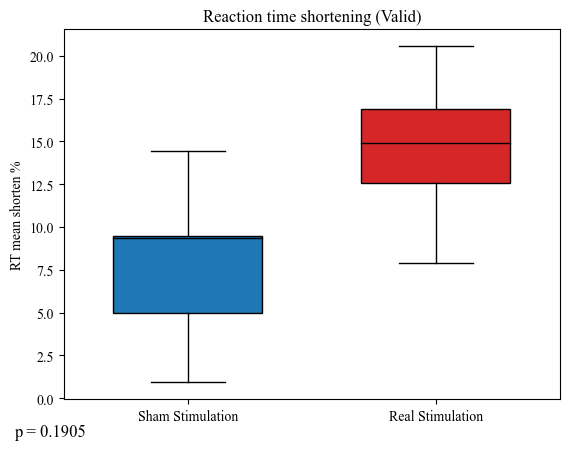

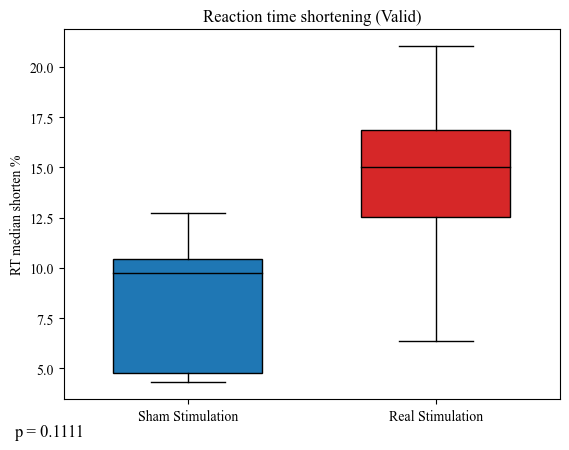

In [260]:
# box plot of RT difference
compare_objects = ["RT mean shorten %", "RT median shorten %"]
for compare_object in compare_objects:
    watch = 'Valid'
    save_path = os.path.join('..', '..', '..', 'docs', 'report', 'figs', watch+"_"+compare_object+'.png')

    rt_diff_sham = behavior_compare.loc[behavior_compare['Real stimulation'] == 0, compare_object]
    rt_diff_real = behavior_compare.loc[behavior_compare['Real stimulation'] == 1, compare_object]
    rt_diff_sham = pd.to_numeric(rt_diff_sham)
    rt_diff_real = pd.to_numeric(rt_diff_real)

    # create boxplot
    # Create a box plot with whiskers
    fig, ax = plt.subplots()
    boxplots = ax.boxplot([rt_diff_sham, rt_diff_real], patch_artist=True, widths=0.6, showfliers=False)

    # Set colors for the box plots
    colors = ['#1f77b4', '#d62728']
    for patch, color in zip(boxplots['boxes'], colors):
        patch.set_facecolor(color)

    # Set median line color to black
    for median in boxplots['medians']:
        median.set_color('black')

    plt.xticks([1, 2], ['Sham Stimulation', 'Real Stimulation'])
    plt.ylabel(compare_object)
    plt.title('Reaction time shortening' + ' (' + watch + ')')

    # Perform the Mann-Whitney U test
    U, p_value = stats.mannwhitneyu(rt_diff_sham, rt_diff_real)

    # Add the p-value to the plot
    ax.annotate(f'p = {p_value:.4f}',
                xy=(-0.1, -0.1),
                xycoords=('axes fraction', 'axes fraction'),
                ha='left', fontsize=12)
    plt.savefig(save_path, format='png')

    plt.show()

## Endo valid

In [261]:
behavior_compare = fb.create_compare()
for subject_id in range (1,19):
    behavior_before, behavior_after = fb.load_behavior(subject_id)

    # pick endo
    behavior_before = behavior_before[(behavior_before['valid'] == 1) & (behavior_before['type'] == 1)]
    behavior_after = behavior_after[(behavior_after['valid'] == 1) & (behavior_after['type'] == 1)]

    behavior_compare = fb.make_compare(subject_id, behavior_before, behavior_after, behavior_compare) #, verbose=True)

behavior_watch = behavior_compare[behavior_compare['Real stimulation'] == 1]
display(behavior_watch.drop(['trials_before', 'trials_after'], axis=1))

behavior_watch = behavior_compare[behavior_compare['Real stimulation'] == 0]
display(behavior_watch.drop(['trials_before', 'trials_after'], axis=1))

# real_to_pick = [1,3,5,9]
# sham_to_pick = [2,11,15,16]
behavior_compare = behavior_compare[behavior_compare['subject id'].isin(real_to_pick+sham_to_pick)]
display(behavior_compare.drop(['trials_before', 'trials_after'], axis=1))

,subject id,Real stimulation,RT mean shorten,RT median shorten,RT mean shorten %,RT std decrease,RT median shorten %
0,1,1,35.990843,32.5,16.689247,0.212132,15.299878
2,3,1,19.710703,24.755,8.477887,-5.297908,10.882515
3,4,1,-18.88584,-32.85,-8.116292,-3.028655,-14.910469
4,5,1,56.152391,50.085,19.503733,-2.810417,17.528172
8,9,1,19.733237,18.13,6.159344,1.426984,5.81705
11,12,1,-32.162222,-21.05,-13.36726,-18.402609,-8.645829
12,13,1,-35.292292,-40.65,-14.358328,-0.00391,-17.076603
16,17,1,38.863295,24.295,10.457137,35.269067,6.845108
17,18,1,25.266383,33.92,8.106154,-7.409611,10.965635


,subject id,Real stimulation,RT mean shorten,RT median shorten,RT mean shorten %,RT std decrease,RT median shorten %
1,2,0,27.822846,16.29,9.173,23.638408,5.563145
5,6,0,-7.121556,-0.745,-2.608915,-2.941227,-0.275768
6,7,0,24.167697,26.67,8.737375,-5.907102,9.80731
7,8,0,47.478913,56.815,19.701309,14.251841,23.082392
9,10,0,25.267618,21.91,9.37642,13.524538,8.367066
10,11,0,11.709318,8.48,4.686863,14.07861,3.47976
13,14,0,48.523597,23.44,14.590762,32.03613,7.578893
14,15,0,3.703375,9.18,1.024685,-2.241313,2.579739
15,16,0,28.436159,25.315,9.448082,10.243919,8.439318


,subject id,Real stimulation,RT mean shorten,RT median shorten,RT mean shorten %,RT std decrease,RT median shorten %
0,1,1,35.990843,32.5,16.689247,0.212132,15.299878
1,2,0,27.822846,16.29,9.173,23.638408,5.563145
2,3,1,19.710703,24.755,8.477887,-5.297908,10.882515
4,5,1,56.152391,50.085,19.503733,-2.810417,17.528172
6,7,0,24.167697,26.67,8.737375,-5.907102,9.80731
8,9,1,19.733237,18.13,6.159344,1.426984,5.81705
10,11,0,11.709318,8.48,4.686863,14.07861,3.47976
14,15,0,3.703375,9.18,1.024685,-2.241313,2.579739
15,16,0,28.436159,25.315,9.448082,10.243919,8.439318


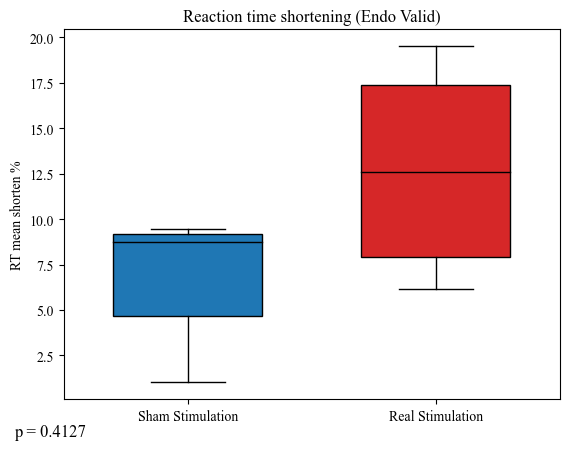

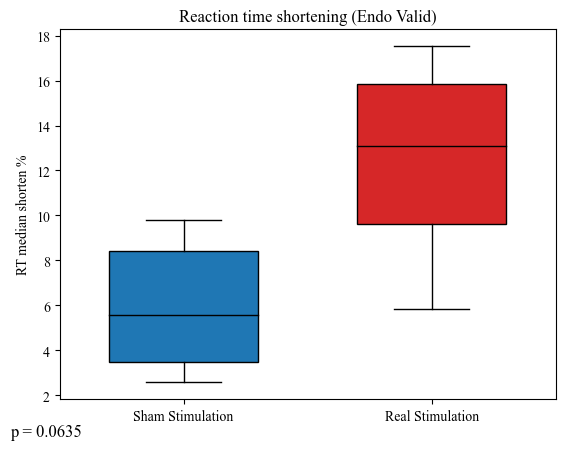

In [262]:
# box plot of RT difference
compare_objects = ["RT mean shorten %", "RT median shorten %"]
for compare_object in compare_objects:
    watch = 'Endo Valid'
    save_path = os.path.join('..', '..', '..', 'docs', 'report', 'figs', watch+"_"+compare_object+'.png')

    rt_diff_sham = behavior_compare.loc[behavior_compare['Real stimulation'] == 0, compare_object]
    rt_diff_real = behavior_compare.loc[behavior_compare['Real stimulation'] == 1, compare_object]
    rt_diff_sham = pd.to_numeric(rt_diff_sham)
    rt_diff_real = pd.to_numeric(rt_diff_real)

    # create boxplot
    # Create a box plot with whiskers
    fig, ax = plt.subplots()
    boxplots = ax.boxplot([rt_diff_sham, rt_diff_real], patch_artist=True, widths=0.6, showfliers=False)

    # Set colors for the box plots
    colors = ['#1f77b4', '#d62728']
    for patch, color in zip(boxplots['boxes'], colors):
        patch.set_facecolor(color)

    # Set median line color to black
    for median in boxplots['medians']:
        median.set_color('black')

    plt.xticks([1, 2], ['Sham Stimulation', 'Real Stimulation'])
    plt.ylabel(compare_object)
    plt.title('Reaction time shortening' + ' (' + watch + ')')

    # Perform the Mann-Whitney U test
    U, p_value = stats.mannwhitneyu(rt_diff_sham, rt_diff_real)

    # Add the p-value to the plot
    ax.annotate(f'p = {p_value:.4f}',
                xy=(-0.1, -0.1),
                xycoords=('axes fraction', 'axes fraction'),
                ha='left', fontsize=12)
    plt.savefig(save_path, format='png')

    plt.show()

## Exo valid

In [263]:
behavior_compare = fb.create_compare()
for subject_id in range (1,19):
    behavior_before, behavior_after = fb.load_behavior(subject_id)

    # pick endo
    behavior_before = behavior_before[(behavior_before['valid'] == 1) & (behavior_before['type'] == 2)]
    behavior_after = behavior_after[(behavior_after['valid'] == 1) & (behavior_after['type'] == 2)]

    behavior_compare = fb.make_compare(subject_id, behavior_before, behavior_after, behavior_compare) #, verbose=True)

behavior_watch = behavior_compare[behavior_compare['Real stimulation'] == 1]
display(behavior_watch.drop(['trials_before', 'trials_after'], axis=1))

behavior_watch = behavior_compare[behavior_compare['Real stimulation'] == 0]
display(behavior_watch.drop(['trials_before', 'trials_after'], axis=1))

# real_to_pick = [1,3,5,9]
# sham_to_pick = [2,11,15,16]
behavior_compare = behavior_compare[behavior_compare['subject id'].isin(real_to_pick+sham_to_pick)]
display(behavior_compare.drop(['trials_before', 'trials_after'], axis=1))

,subject id,Real stimulation,RT mean shorten,RT median shorten,RT mean shorten %,RT std decrease,RT median shorten %
0,1,1,30.503551,31.505,15.025993,-13.758986,15.307808
2,3,1,45.442711,52.17,19.324746,-5.594956,22.088149
3,4,1,34.192112,36.34,12.014105,10.846153,14.068912
4,5,1,70.824655,78.5,22.494956,2.991941,24.85357
8,9,1,39.341018,28.13,11.740509,23.208586,8.73494
11,12,1,-19.908913,-21.9,-7.222126,-1.748348,-8.509812
12,13,1,-15.051436,-15.355,-5.563942,-2.059201,-5.805842
16,17,1,17.511574,43.975,4.143324,3.242744,10.373664
17,18,1,22.323825,28.815,7.066519,11.815187,9.187431


,subject id,Real stimulation,RT mean shorten,RT median shorten,RT mean shorten %,RT std decrease,RT median shorten %
1,2,0,41.381492,37.16,11.082674,6.247944,10.063915
5,6,0,-23.878688,-38.45,-8.954968,-16.280615,-15.09797
6,7,0,42.914462,47.52,14.774366,12.292878,16.467408
7,8,0,40.843043,38.54,14.17223,16.070229,14.077767
9,10,0,-3.149674,-1.91,-1.280746,-8.377066,-0.779687
10,11,0,14.818444,15.11,5.940008,11.36997,6.034345
13,14,0,56.357454,56.275,15.560066,27.683193,16.111254
14,15,0,16.22415,32.375,3.982377,1.837354,8.008262
15,16,0,27.651887,33.985,9.222254,11.112276,11.233782


,subject id,Real stimulation,RT mean shorten,RT median shorten,RT mean shorten %,RT std decrease,RT median shorten %
0,1,1,30.503551,31.505,15.025993,-13.758986,15.307808
1,2,0,41.381492,37.16,11.082674,6.247944,10.063915
2,3,1,45.442711,52.17,19.324746,-5.594956,22.088149
4,5,1,70.824655,78.5,22.494956,2.991941,24.85357
6,7,0,42.914462,47.52,14.774366,12.292878,16.467408
8,9,1,39.341018,28.13,11.740509,23.208586,8.73494
10,11,0,14.818444,15.11,5.940008,11.36997,6.034345
14,15,0,16.22415,32.375,3.982377,1.837354,8.008262
15,16,0,27.651887,33.985,9.222254,11.112276,11.233782


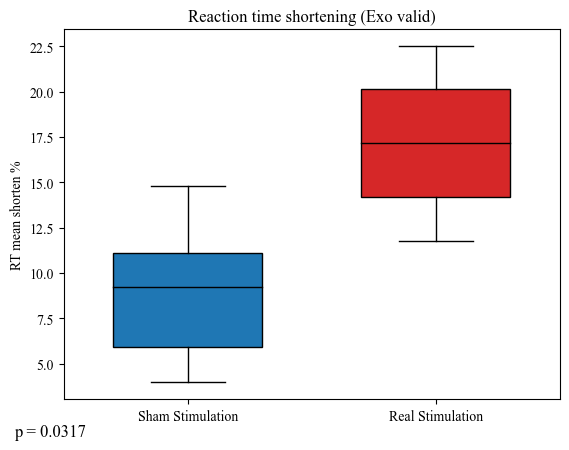

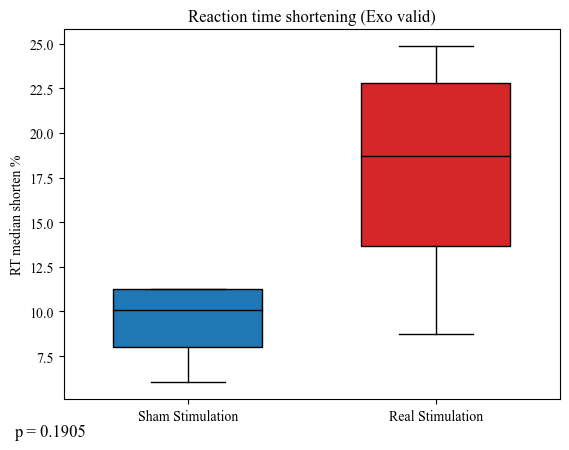

In [264]:
# box plot of RT difference
compare_objects = ["RT mean shorten %", "RT median shorten %"]
for compare_object in compare_objects:
    watch = 'Exo valid'
    save_path = os.path.join('..', '..', '..', 'docs', 'report', 'figs', watch+"_"+compare_object+'.png')

    rt_diff_sham = behavior_compare.loc[behavior_compare['Real stimulation'] == 0, compare_object]
    rt_diff_real = behavior_compare.loc[behavior_compare['Real stimulation'] == 1, compare_object]
    rt_diff_sham = pd.to_numeric(rt_diff_sham)
    rt_diff_real = pd.to_numeric(rt_diff_real)

    # create boxplot
    # Create a box plot with whiskers
    fig, ax = plt.subplots()
    boxplots = ax.boxplot([rt_diff_sham, rt_diff_real], patch_artist=True, widths=0.6, showfliers=False)

    # Set colors for the box plots
    colors = ['#1f77b4', '#d62728']
    for patch, color in zip(boxplots['boxes'], colors):
        patch.set_facecolor(color)

    # Set median line color to black
    for median in boxplots['medians']:
        median.set_color('black')

    plt.xticks([1, 2], ['Sham Stimulation', 'Real Stimulation'])
    plt.ylabel(compare_object)
    plt.title('Reaction time shortening' + ' (' + watch + ')')

    # Perform the Mann-Whitney U test
    U, p_value = stats.mannwhitneyu(rt_diff_sham, rt_diff_real)

    # Add the p-value to the plot
    ax.annotate(f'p = {p_value:.4f}',
                xy=(-0.1, -0.1),
                xycoords=('axes fraction', 'axes fraction'),
                ha='left', fontsize=12)
    plt.savefig(save_path, format='png')

    plt.show()

## Invalid

In [265]:
behavior_compare = fb.create_compare()
for subject_id in range (1,19):
    behavior_before, behavior_after = fb.load_behavior(subject_id)

    # pick endo
    behavior_before = behavior_before[behavior_before['valid'] == -1]
    behavior_after = behavior_after[behavior_after['valid'] == -1]

    behavior_compare = fb.make_compare(subject_id, behavior_before, behavior_after, behavior_compare)# , verbose=True)

behavior_watch = behavior_compare[behavior_compare['Real stimulation'] == 1]
display(behavior_watch.drop(['trials_before', 'trials_after'], axis=1))

behavior_watch = behavior_compare[behavior_compare['Real stimulation'] == 0]
display(behavior_watch.drop(['trials_before', 'trials_after'], axis=1))

# real_to_pick = [1,3,5,9]
# sham_to_pick = [2,11,15,16]
behavior_compare = behavior_compare[behavior_compare['subject id'].isin(real_to_pick+sham_to_pick)]
display(behavior_compare.drop(['trials_before', 'trials_after'], axis=1))

,subject id,Real stimulation,RT mean shorten,RT median shorten,RT mean shorten %,RT std decrease,RT median shorten %
0,1,1,10.135083,14.07,4.127326,-20.22591,5.881001
2,3,1,52.31996,45.835,16.665641,17.66331,15.2415
3,4,1,-70.310483,-28.49,-26.704401,-68.868515,-11.806879
4,5,1,98.925404,87.23,23.519311,37.845518,21.996117
8,9,1,34.016667,73.415,7.543613,-32.729945,16.194604
11,12,1,-76.028351,-65.135,-28.568172,-13.136638,-24.666742
12,13,1,-43.800108,-43.53,-15.817323,5.580416,-15.841764
16,17,1,3.177121,1.1,0.732832,2.317898,0.263941
17,18,1,5.182964,1.82,1.480192,-12.320343,0.549185


,subject id,Real stimulation,RT mean shorten,RT median shorten,RT mean shorten %,RT std decrease,RT median shorten %
1,2,0,99.440683,58.08,23.793176,84.608893,15.642759
5,6,0,-52.363571,-45.85,-16.791371,-21.808904,-15.569289
6,7,0,-2.110138,-11.445,-0.657235,-4.126927,-3.707603
7,8,0,27.041071,20.69,9.114277,7.909904,7.269597
9,10,0,19.965528,18.34,6.035372,13.957861,5.861672
10,11,0,21.052424,10.115,6.988378,-7.29668,3.349116
13,14,0,55.391856,30.02,12.760681,12.09285,7.539399
14,15,0,43.543826,50.07,10.579217,-20.188995,12.188116
15,16,0,-13.439167,-5.315,-3.880969,-5.560135,-1.656073


,subject id,Real stimulation,RT mean shorten,RT median shorten,RT mean shorten %,RT std decrease,RT median shorten %
0,1,1,10.135083,14.07,4.127326,-20.22591,5.881001
1,2,0,99.440683,58.08,23.793176,84.608893,15.642759
2,3,1,52.31996,45.835,16.665641,17.66331,15.2415
4,5,1,98.925404,87.23,23.519311,37.845518,21.996117
6,7,0,-2.110138,-11.445,-0.657235,-4.126927,-3.707603
8,9,1,34.016667,73.415,7.543613,-32.729945,16.194604
10,11,0,21.052424,10.115,6.988378,-7.29668,3.349116
14,15,0,43.543826,50.07,10.579217,-20.188995,12.188116
15,16,0,-13.439167,-5.315,-3.880969,-5.560135,-1.656073


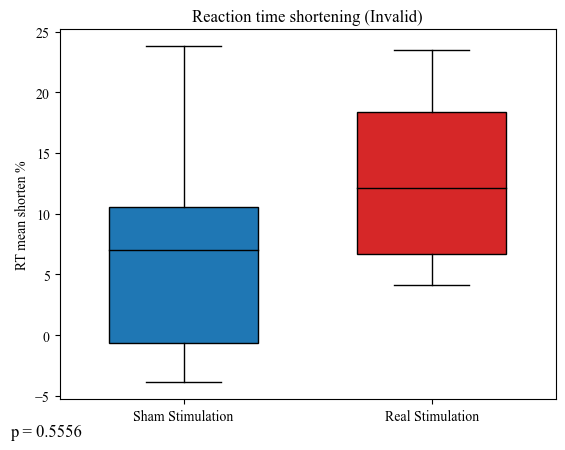

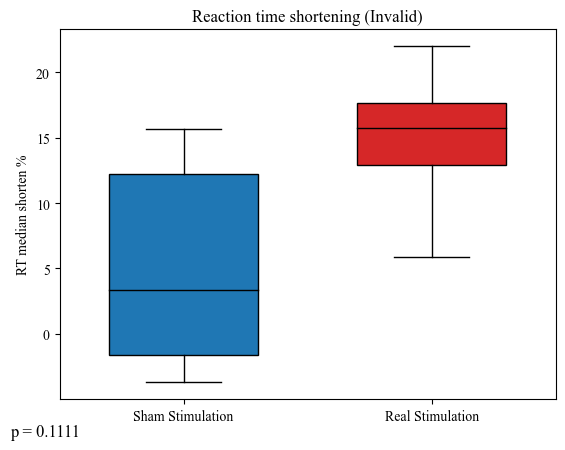

In [266]:
# box plot of RT difference
compare_objects = ["RT mean shorten %", "RT median shorten %"]
for compare_object in compare_objects:
    watch = 'Invalid'
    save_path = os.path.join('..', '..', '..', 'docs', 'report', 'figs', watch+"_"+compare_object+'.png')

    rt_diff_sham = behavior_compare.loc[behavior_compare['Real stimulation'] == 0, compare_object]
    rt_diff_real = behavior_compare.loc[behavior_compare['Real stimulation'] == 1, compare_object]
    rt_diff_sham = pd.to_numeric(rt_diff_sham)
    rt_diff_real = pd.to_numeric(rt_diff_real)

    # create boxplot
    # Create a box plot with whiskers
    fig, ax = plt.subplots()
    boxplots = ax.boxplot([rt_diff_sham, rt_diff_real], patch_artist=True, widths=0.6, showfliers=False)

    # Set colors for the box plots
    colors = ['#1f77b4', '#d62728']
    for patch, color in zip(boxplots['boxes'], colors):
        patch.set_facecolor(color)

    # Set median line color to black
    for median in boxplots['medians']:
        median.set_color('black')

    plt.xticks([1, 2], ['Sham Stimulation', 'Real Stimulation'])
    plt.ylabel(compare_object)
    plt.title('Reaction time shortening' + ' (' + watch + ')')

    # Perform the Mann-Whitney U test
    U, p_value = stats.mannwhitneyu(rt_diff_sham, rt_diff_real)

    # Add the p-value to the plot
    ax.annotate(f'p = {p_value:.4f}',
                xy=(-0.1, -0.1),
                xycoords=('axes fraction', 'axes fraction'),
                ha='left', fontsize=12)
    plt.savefig(save_path, format='png')

    plt.show()

## Endo invalid

In [267]:
behavior_compare = fb.create_compare()
for subject_id in range (1,19):
    behavior_before, behavior_after = fb.load_behavior(subject_id)

    # pick endo
    behavior_before = behavior_before[(behavior_before['valid'] == -1) & (behavior_before['type'] == 1)]
    behavior_after = behavior_after[(behavior_after['valid'] == -1) & (behavior_after['type'] == 1)]

    behavior_compare = fb.make_compare(subject_id, behavior_before, behavior_after, behavior_compare) #, verbose=True)

behavior_watch = behavior_compare[behavior_compare['Real stimulation'] == 1]
display(behavior_watch.drop(['trials_before', 'trials_after'], axis=1))

behavior_watch = behavior_compare[behavior_compare['Real stimulation'] == 0]
display(behavior_watch.drop(['trials_before', 'trials_after'], axis=1))

# real_to_pick = [1,3,5,9]
# sham_to_pick = [2,11,15,16]
behavior_compare = behavior_compare[behavior_compare['subject id'].isin(real_to_pick+sham_to_pick)]
display(behavior_compare.drop(['trials_before', 'trials_after'], axis=1))

,subject id,Real stimulation,RT mean shorten,RT median shorten,RT mean shorten %,RT std decrease,RT median shorten %
0,1,1,49.6475,-9.55,15.683647,47.074527,-3.417183
2,3,1,55.436818,24.315,16.939428,53.11457,8.08546
3,4,1,-44.10875,-72.985,-14.486941,18.495478,-27.139032
4,5,1,131.235556,145.76,26.255221,51.641096,29.617588
8,9,1,21.589394,28.595,4.318114,-49.768095,5.62473
11,12,1,-71.559697,-37.36,-27.146703,-36.045078,-14.644089
12,13,1,-58.866667,-55.44,-21.44056,-17.702094,-21.477134
16,17,1,15.387348,13.955,3.412826,-1.047083,3.25595
17,18,1,49.029182,76.995,12.296701,-9.196914,18.417213


,subject id,Real stimulation,RT mean shorten,RT median shorten,RT mean shorten %,RT std decrease,RT median shorten %
1,2,0,182.257727,195.515,36.47396,86.022234,38.667603
5,6,0,-17.661288,-72.155,-4.535344,9.166497,-20.504405
6,7,0,15.570182,10.7,4.504112,10.849448,3.05252
7,8,0,26.113889,34.62,9.036729,24.85309,12.504515
9,10,0,29.707833,15.805,8.172337,18.702599,4.465951
10,11,0,31.386182,22.95,9.647254,3.960467,7.322676
13,14,0,58.861667,-1.05,12.367499,42.703748,-0.255124
14,15,0,46.59375,81.45,11.306967,-29.153606,19.383166
15,16,0,-34.5125,-15.065,-8.884613,12.565664,-3.704432


,subject id,Real stimulation,RT mean shorten,RT median shorten,RT mean shorten %,RT std decrease,RT median shorten %
0,1,1,49.6475,-9.55,15.683647,47.074527,-3.417183
1,2,0,182.257727,195.515,36.47396,86.022234,38.667603
2,3,1,55.436818,24.315,16.939428,53.11457,8.08546
4,5,1,131.235556,145.76,26.255221,51.641096,29.617588
6,7,0,15.570182,10.7,4.504112,10.849448,3.05252
8,9,1,21.589394,28.595,4.318114,-49.768095,5.62473
10,11,0,31.386182,22.95,9.647254,3.960467,7.322676
14,15,0,46.59375,81.45,11.306967,-29.153606,19.383166
15,16,0,-34.5125,-15.065,-8.884613,12.565664,-3.704432


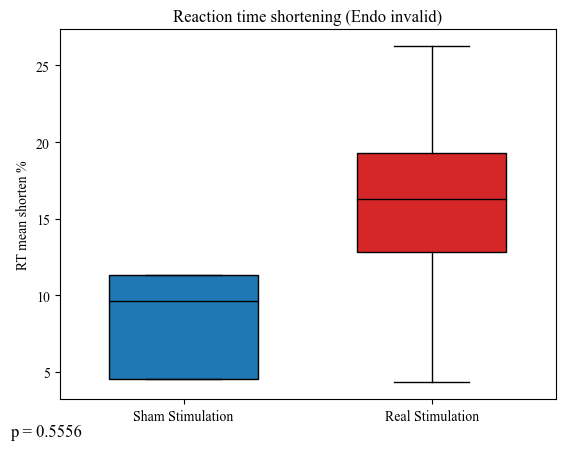

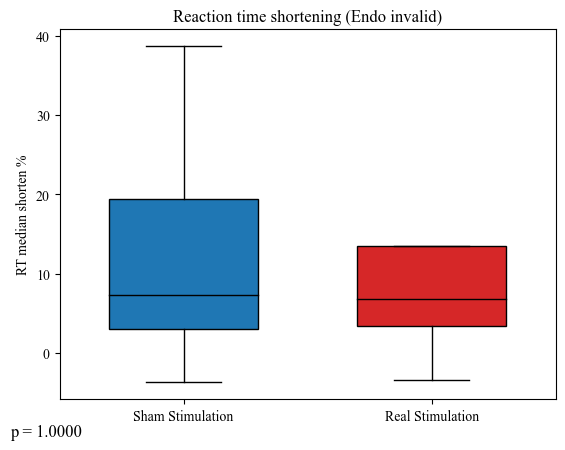

In [268]:
# box plot of RT difference
compare_objects = ["RT mean shorten %", "RT median shorten %"]
for compare_object in compare_objects:
    watch = 'Endo invalid'
    save_path = os.path.join('..', '..', '..', 'docs', 'report', 'figs', watch+"_"+compare_object+'.png')

    rt_diff_sham = behavior_compare.loc[behavior_compare['Real stimulation'] == 0, compare_object]
    rt_diff_real = behavior_compare.loc[behavior_compare['Real stimulation'] == 1, compare_object]
    rt_diff_sham = pd.to_numeric(rt_diff_sham)
    rt_diff_real = pd.to_numeric(rt_diff_real)

    # create boxplot
    # Create a box plot with whiskers
    fig, ax = plt.subplots()
    boxplots = ax.boxplot([rt_diff_sham, rt_diff_real], patch_artist=True, widths=0.6, showfliers=False)

    # Set colors for the box plots
    colors = ['#1f77b4', '#d62728']
    for patch, color in zip(boxplots['boxes'], colors):
        patch.set_facecolor(color)

    # Set median line color to black
    for median in boxplots['medians']:
        median.set_color('black')

    plt.xticks([1, 2], ['Sham Stimulation', 'Real Stimulation'])
    plt.ylabel(compare_object)
    plt.title('Reaction time shortening' + ' (' + watch + ')')

    # Perform the Mann-Whitney U test
    U, p_value = stats.mannwhitneyu(rt_diff_sham, rt_diff_real)

    # Add the p-value to the plot
    ax.annotate(f'p = {p_value:.4f}',
                xy=(-0.1, -0.1),
                xycoords=('axes fraction', 'axes fraction'),
                ha='left', fontsize=12)
    plt.savefig(save_path, format='png')

    plt.show()

## Exo invalid

In [269]:
behavior_compare = fb.create_compare()
for subject_id in range (1,19):
    behavior_before, behavior_after = fb.load_behavior(subject_id)

    # pick endo
    behavior_before = behavior_before[(behavior_before['valid'] == -1) & (behavior_before['type'] == 1)]
    behavior_after = behavior_after[(behavior_after['valid'] == -1) & (behavior_after['type'] == 1)]

    behavior_compare = fb.make_compare(subject_id, behavior_before, behavior_after, behavior_compare) #, verbose=True)

behavior_watch = behavior_compare[behavior_compare['Real stimulation'] == 1]
display(behavior_watch.drop(['trials_before', 'trials_after'], axis=1))

behavior_watch = behavior_compare[behavior_compare['Real stimulation'] == 0]
display(behavior_watch.drop(['trials_before', 'trials_after'], axis=1))

# real_to_pick = [1,3,5,9]
# sham_to_pick = [2,11,15,16]
behavior_compare = behavior_compare[behavior_compare['subject id'].isin(real_to_pick+sham_to_pick)]
display(behavior_compare.drop(['trials_before', 'trials_after'], axis=1))


,subject id,Real stimulation,RT mean shorten,RT median shorten,RT mean shorten %,RT std decrease,RT median shorten %
0,1,1,49.6475,-9.55,15.683647,47.074527,-3.417183
2,3,1,55.436818,24.315,16.939428,53.11457,8.08546
3,4,1,-44.10875,-72.985,-14.486941,18.495478,-27.139032
4,5,1,131.235556,145.76,26.255221,51.641096,29.617588
8,9,1,21.589394,28.595,4.318114,-49.768095,5.62473
11,12,1,-71.559697,-37.36,-27.146703,-36.045078,-14.644089
12,13,1,-58.866667,-55.44,-21.44056,-17.702094,-21.477134
16,17,1,15.387348,13.955,3.412826,-1.047083,3.25595
17,18,1,49.029182,76.995,12.296701,-9.196914,18.417213


,subject id,Real stimulation,RT mean shorten,RT median shorten,RT mean shorten %,RT std decrease,RT median shorten %
1,2,0,182.257727,195.515,36.47396,86.022234,38.667603
5,6,0,-17.661288,-72.155,-4.535344,9.166497,-20.504405
6,7,0,15.570182,10.7,4.504112,10.849448,3.05252
7,8,0,26.113889,34.62,9.036729,24.85309,12.504515
9,10,0,29.707833,15.805,8.172337,18.702599,4.465951
10,11,0,31.386182,22.95,9.647254,3.960467,7.322676
13,14,0,58.861667,-1.05,12.367499,42.703748,-0.255124
14,15,0,46.59375,81.45,11.306967,-29.153606,19.383166
15,16,0,-34.5125,-15.065,-8.884613,12.565664,-3.704432


,subject id,Real stimulation,RT mean shorten,RT median shorten,RT mean shorten %,RT std decrease,RT median shorten %
0,1,1,49.6475,-9.55,15.683647,47.074527,-3.417183
1,2,0,182.257727,195.515,36.47396,86.022234,38.667603
2,3,1,55.436818,24.315,16.939428,53.11457,8.08546
4,5,1,131.235556,145.76,26.255221,51.641096,29.617588
6,7,0,15.570182,10.7,4.504112,10.849448,3.05252
8,9,1,21.589394,28.595,4.318114,-49.768095,5.62473
10,11,0,31.386182,22.95,9.647254,3.960467,7.322676
14,15,0,46.59375,81.45,11.306967,-29.153606,19.383166
15,16,0,-34.5125,-15.065,-8.884613,12.565664,-3.704432


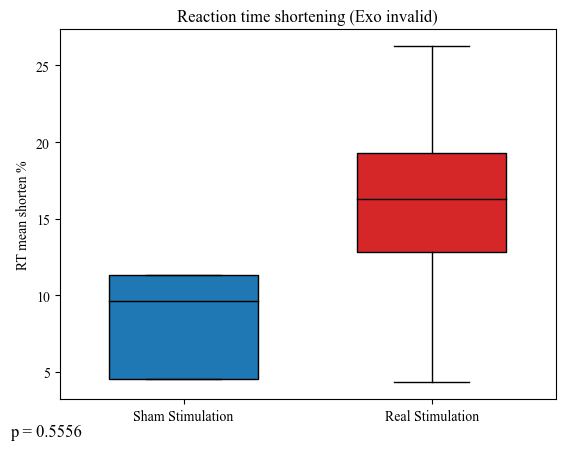

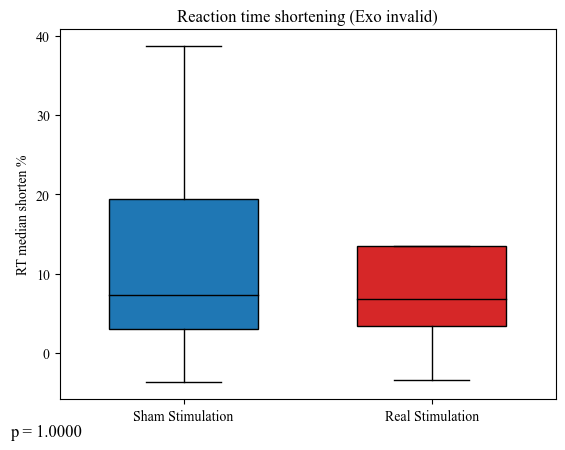

In [270]:
# box plot of RT difference
compare_objects = ["RT mean shorten %", "RT median shorten %"]
for compare_object in compare_objects:
    watch = 'Exo invalid'
    save_path = os.path.join('..', '..', '..', 'docs', 'report', 'figs', watch+"_"+compare_object+'.png')

    rt_diff_sham = behavior_compare.loc[behavior_compare['Real stimulation'] == 0, compare_object]
    rt_diff_real = behavior_compare.loc[behavior_compare['Real stimulation'] == 1, compare_object]
    rt_diff_sham = pd.to_numeric(rt_diff_sham)
    rt_diff_real = pd.to_numeric(rt_diff_real)

    # create boxplot
    # Create a box plot with whiskers
    fig, ax = plt.subplots()
    boxplots = ax.boxplot([rt_diff_sham, rt_diff_real], patch_artist=True, widths=0.6, showfliers=False)

    # Set colors for the box plots
    colors = ['#1f77b4', '#d62728']
    for patch, color in zip(boxplots['boxes'], colors):
        patch.set_facecolor(color)

    # Set median line color to black
    for median in boxplots['medians']:
        median.set_color('black')

    plt.xticks([1, 2], ['Sham Stimulation', 'Real Stimulation'])
    plt.ylabel(compare_object)
    plt.title('Reaction time shortening' + ' (' + watch + ')')

    # Perform the Mann-Whitney U test
    U, p_value = stats.mannwhitneyu(rt_diff_sham, rt_diff_real)

    # Add the p-value to the plot
    ax.annotate(f'p = {p_value:.4f}',
                xy=(-0.1, -0.1),
                xycoords=('axes fraction', 'axes fraction'),
                ha='left', fontsize=12)
    plt.savefig(save_path, format='png')

    plt.show()